In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

from explore import group_tenure, group_monthly_charges, start_explore, plot_data, get_df

In [2]:
train = start_explore()
df = get_df(train)

In [3]:
# What does the customer who churns look like?
with pd.option_context('display.max_columns', None):
    display(df[df.churn == 'Yes'].describe())

,tenure,monthly_charges,total_charges,senior_citizen,gender_enc,family_support,phone_service_enc,contract_type_id,internet_service_type_id,extra_lines,internet_services,has_internet,online_security_enc,online_backup_enc,device_protection_enc,tech_support_enc,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto
count,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000
mean,19.311,76.133,1667.299,0.247,0.472,0.712,0.936,1.191,1.834,1.426,2.776,0.941,0.173,0.291,0.298,0.191,0.436,0.444,0.709,0.556,0.158,0.138,0.148,0.286
std,20.795,24.157,2014.101,0.432,0.500,0.897,0.245,0.476,0.506,0.611,1.636,0.235,0.379,0.455,0.458,0.394,0.497,0.497,0.455,0.497,0.365,0.345,0.356,0.452
min,1.000,19.400,19.400,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,64.200,156.100,0.000,0.000,0.000,1.000,1.000,2.000,1.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,10.000,80.450,738.650,0.000,0.000,0.000,1.000,1.000,2.000,1.000,2.500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
75%,32.250,95.100,2657.650,0.000,1.000,1.000,1.000,1.000,2.000,2.000,4.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
max,72.000,118.350,8684.800,1.000,1.000,3.000,1.000,3.000,3.000,2.000,7.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


#### 1. Are there clear groupings where a customer is more likely to churn?

In [1]:
plt.figure(figsize=(18, 12))
sns.swarmplot(x='contract_type_id', y="tenure_months", data=train, hue='churn')

plt.show()

NameError: name 'plt' is not defined

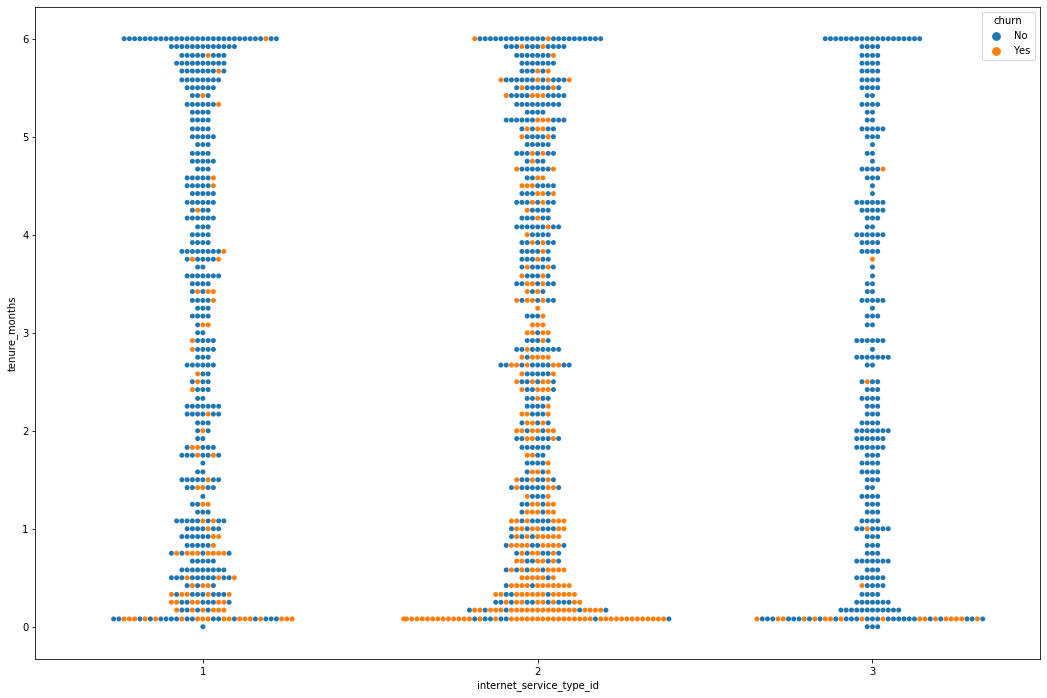

In [5]:
plt.figure(figsize=(18, 12))
sns.swarmplot(x='internet_service_type_id', y="tenure_months", data=train, hue='churn');
plt.show()

In [6]:
# Turn each of those categories into variables and look at their rate of churn

num_internet_only = df[df.has_internet == 1][df.phone_service_enc == 0][df.internet_services == 1].shape[0]
internet_only_churn = df[df.has_internet == 1][df.phone_service_enc == 0][df.internet_services == 1][df.churn == 'Yes'].shape[0]
internet_rate = (internet_only_churn / num_internet_only)

num_phone_only = df[df.has_internet == 0][df.phone_service_enc == 1].shape[0]
phone_only_churn = df[df.has_internet == 0][df.phone_service_enc == 1][df.churn == 'Yes'].shape[0]
phone_rate = (phone_only_churn / num_phone_only)

num_all = df.shape[0]
num_churn = df[df.churn == 'Yes'].shape[0]
all_rate = (num_churn / num_all)

# customers without phone
num_DSL = DSL.shape[0]
DSL_churn = DSL[df.churn == 'Yes'].shape[0]
DSL_rate = (DSL_churn / num_DSL)

num_FO = FO.shape[0]
FO_churn = FO[df.churn == 'Yes'].shape[0]
FO_rate = (FO_churn / num_FO)

# all DSL customers, even with phone
num_DSL2 = DSL2.shape[0]
DSL2_churn = DSL2[df.churn == 'Yes'].shape[0]
DSL2_rate = (DSL2_churn / num_DSL2)

# all Fiber Optic customers, even with phone
num_FO2 = FO2.shape[0]
FO2_churn = FO2[df.churn == 'Yes'].shape[0]
FO2_rate = (FO2_churn / num_FO2)

print (f'Rate of churn for people who have DSL: {DSL2_rate}')
print (f'Rate of churn for people who have Fiber Optic: {FO2_rate}')
print (f'Rate of churn for people who only have DSL: {DSL_rate}')
print (f'Rate of churn for people who only have Fiber Optic: {FO_rate}')
print (f'Rate of churn for people who only have internet: {internet_rate}')
print (f'Rate of churn for people who only have phone: {phone_rate}')
print (f'Overal rate of churn: {all_rate}')

NameError: name 'DSL' is not defined

In [ ]:
num_DSL_online_sec = DSL2[df.online_security_enc == 1].shape[0]
DSL_online_sec_churn = DSL2[df.online_security_enc == 1][df.churn == 'Yes'].shape[0]
DSL_online_sec_rate = (DSL_online_sec_churn / num_DSL_online_sec)

num_FO_online_sec = FO2[df.online_security_enc == 1].shape[0]
FO_online_sec_churn = FO2[df.online_security_enc == 1][df.churn == 'Yes'].shape[0]
FO_online_sec_rate = (FO_online_sec_churn / num_FO_online_sec)

num_DSL_tech = DSL2[df.tech_support_enc == 1].shape[0]
DSL_tech_churn = DSL2[df.tech_support_enc == 1][df.churn == 'Yes'].shape[0]
DSL_tech_rate = (DSL_tech_churn / num_DSL_tech)

num_FO_tech = FO2[df.tech_support_enc == 1].shape[0]
FO_tech_churn = FO2[df.tech_support_enc == 1][df.churn == 'Yes'].shape[0]
FO_tech_rate = (FO_tech_churn / num_FO_tech)

num_DSL_backup = DSL2[df.online_backup_enc == 1].shape[0]
DSL_backup_churn = DSL2[df.online_backup_enc == 1][df.churn == 'Yes'].shape[0]
DSL_backup_rate = (DSL_backup_churn / num_DSL_backup)

num_FO_backup = FO2[df.online_backup_enc == 1].shape[0]
FO_backup_churn = FO2[df.online_backup_enc == 1][df.churn == 'Yes'].shape[0]
FO_backup_rate = (FO_backup_churn / num_FO_backup)

num_DSL_dev_prot = DSL2[df.device_protection_enc == 1].shape[0]
DSL_dev_prot_churn = DSL2[df.device_protection_enc == 1][df.churn == 'Yes'].shape[0]
DSL_dev_prot_rate = (DSL_dev_prot_churn / num_DSL_dev_prot)

num_FO_dev_prot = FO2[df.device_protection_enc == 1].shape[0]
FO_dev_prot_churn = FO2[df.device_protection_enc == 1][df.churn == 'Yes'].shape[0]
FO_dev_prot_rate = (FO_dev_prot_churn / num_FO_dev_prot)

num_DSL_strm_tv = DSL2[df.streaming_tv_enc == 1].shape[0]
strm_DSL_tv_churn = DSL2[df.streaming_tv_enc == 1][df.churn == 'Yes'].shape[0]
strm_DSL_tv_rate = (strm_DSL_tv_churn / num_DSL_strm_tv)

num_FO_strm_tv = FO2[df.streaming_tv_enc == 1].shape[0]
strm_FO_tv_churn = FO2[df.streaming_tv_enc == 1][df.churn == 'Yes'].shape[0]
strm_FO_tv_rate = (strm_FO_tv_churn / num_FO_strm_tv)

num_DSL_strm_mv = DSL2[df.streaming_movies_enc == 1].shape[0]
strm_DSL_mv_churn = DSL2[df.streaming_movies_enc == 1][df.churn == 'Yes'].shape[0]
strm_DSL_mv_rate = (strm_DSL_mv_churn / num_DSL_strm_mv)

num_FO_strm_mv = FO2[df.streaming_movies_enc == 1].shape[0]
strm_FO_mv_churn = FO2[df.streaming_movies_enc == 1][df.churn == 'Yes'].shape[0]
strm_FO_mv_rate = (strm_FO_mv_churn / num_FO_strm_mv)

print ('DSL Churn rates')
print (f'Rate of churn for people who have DSL and online security: {DSL_online_sec_rate}')
print (f'Rate of churn for people who have DSL and tech support: {DSL_tech_rate}')
print (f'Rate of churn for people who have DSL and online backup: {DSL_backup_rate}')
print (f'Rate of churn for people who have DSL and device protection: {DSL_dev_prot_rate}')
print (f'Rate of churn for people who have DSL and streaming tv: {strm_DSL_tv_rate}')
print (f'Rate of churn for people who have DSL and streaming movies: {strm_DSL_mv_rate}')

print ('-----------------------')
print ('Fiber Optic Churn Rates')
print (f'Rate of churn for people who have Fiber Optic and online security: {FO_online_sec_rate}')
print (f'Rate of churn for people who have Fiber Optic and tech support: {FO_tech_rate}')
print (f'Rate of churn for people who have Fiber Optic and online backup: {FO_backup_rate}')
print (f'Rate of churn for people who have Fiber Optic and device protection: {FO_dev_prot_rate}')
print (f'Rate of churn for people who have Fiber Optic and streaming tv: {strm_FO_tv_rate}')
print (f'Rate of churn for people who have Fiber Optic and streaming movies: {strm_FO_mv_rate}')

In [ ]:
churn_month_to_month_phone_only = df[df.has_internet == 0][df.churn == 'Yes'][df.contract_type_id == 1].shape[0]
churn_month_to_month_dsl_only = df[df.internet_service_type_id == 1][df.churn == 'Yes'][df.contract_type_id == 1].shape[0]
churn_month_to_month_fiber_only = df[df.internet_service_type_id == 2][df.churn == 'Yes'][df.contract_type_id == 1].shape[0]
all_phone_only = df[df.has_internet == 0].shape[0]
all_dsl_only = df[df.internet_service_type_id == 1].shape[0]
all_fiber_only = df[df.internet_service_type_id == 2].shape[0]

churn_month_to_month_phone_only_rate = churn_month_to_month_phone_only / all_phone_only
churn_month_to_month_dsl_only_rate = churn_month_to_month_dsl_only / all_dsl_only
churn_month_to_month_fiber_only_rate = churn_month_to_month_fiber_only / all_fiber_only

print ('Churn rates for month to month contracts:')
print (f'Rate of churn for people who have Phone service only: {churn_month_to_month_phone_only_rate}')
print (f'Rate of churn for people who have DSL only: {churn_month_to_month_dsl_only_rate}')
print (f'Rate of churn for people who have fiber: {churn_month_to_month_fiber_only_rate}\n')